# Gewöhnliche DGL

In [8]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy.integrate

## Anfangswertproblem

In [21]:
def rhs(t, T):
    T0 = 300
    Q = 0
    if t > 25 and t < 50: Q = 100
    return -(T-T0) + Q

In [24]:
res = scipy.integrate.solve_ivp(rhs, [0, 100], [300], dense_output=True)

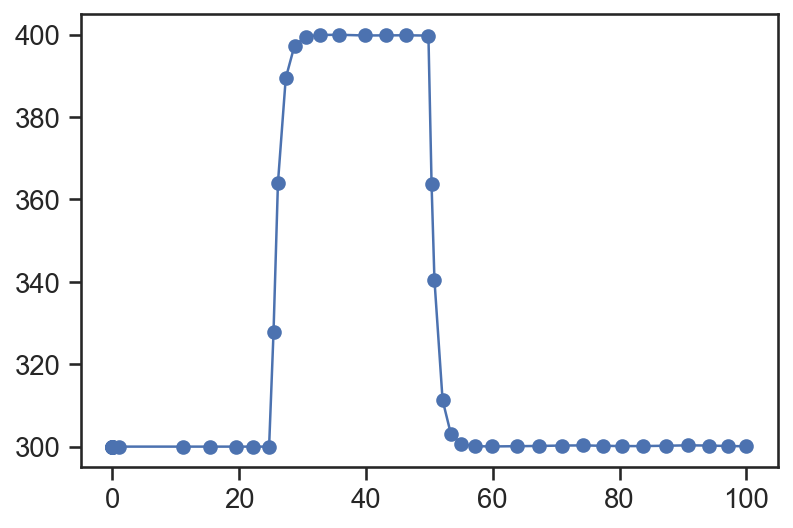

In [26]:
plt.plot(res.t, res.y[0], '-o')

In [58]:
def osc_rhs(t, u):
    y = u[0]
    z = u[1]
    # y' 
    yp = z
    # z'
    zp = - 2*y - 0.2*z
    return [yp, zp]

In [59]:
res = scipy.integrate.solve_ivp(osc_rhs, [0, 50], [1, 0], dense_output=True)

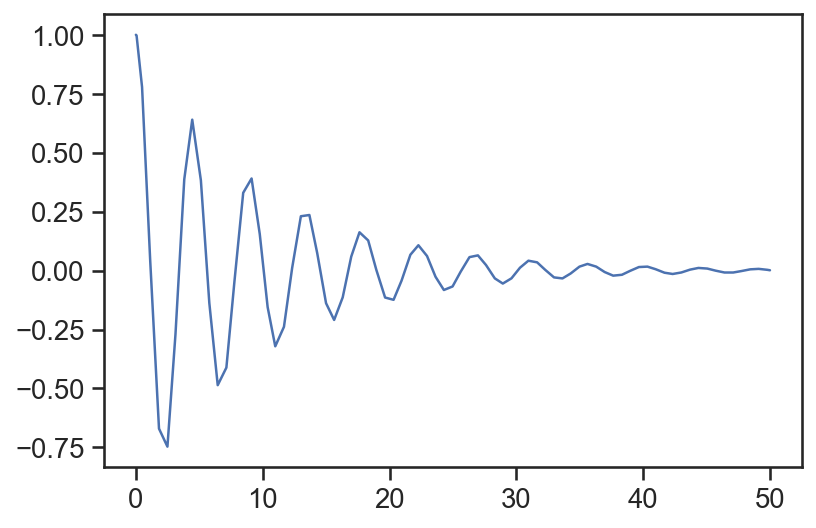

In [60]:
plt.plot(res.t, res.y[0], '-')

In [130]:
def beam_rhs(x, u):
    y0 = u[0]
    y1 = u[1]
    y2 = u[2]
    y3 = u[3]
    # y' 
    yp = y1
    ypp = y2
    yppp = y3
    ypppp = x*0 - 0.01
    return np.vstack((yp, ypp, yppp, ypppp))

In [133]:
def beam_bc(ya, yb):
#     print(ya, yb)
    return np.array([ya[0]-1, ya[2], yb[0], yb[2]])

In [134]:
x = np.linspace(0,10,25)
y_0 = np.zeros((4, x.size))

res = scipy.integrate.solve_bvp(beam_rhs, beam_bc, x, y_0)
# print(res)

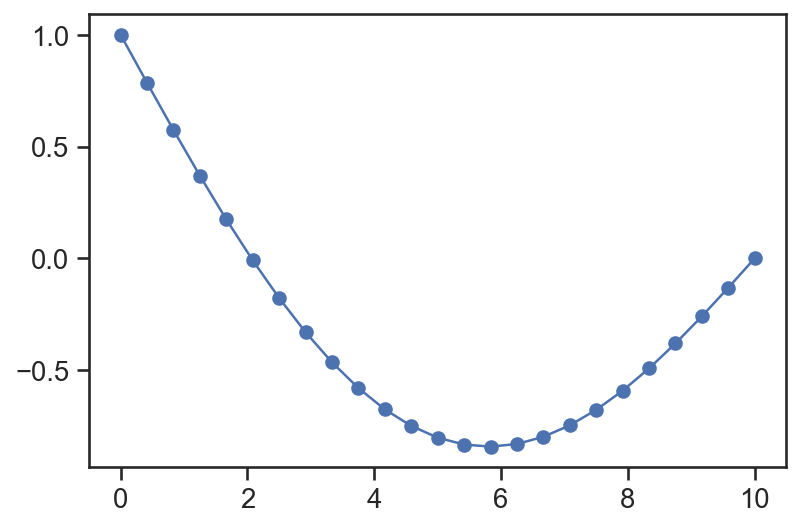

In [135]:
plt.plot(res.x, res.y[0], '-o')